In [7]:
# The following libraries will let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations
import pandas as pd # dataframes
import os
#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks

In [ ]:
cv2.FaceDetectorYN_create('./face_detection_yunet_2023mar.onnx',
                          "", 
                          (300, 300),
                          score_threshold=0.5)

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\onnx\onnx_importer.cpp:278: error: (-5:Bad argument) Can't read ONNX file: ./face_detection_yunet_2023mar.onnx in function 'cv::dnn::dnn4_v20250619::ONNXImporter::ONNXImporter'


In [4]:
def face_detect(photo, scaleFactor=1.1, minNeighbors=5, facecolor =(255,0,0), eyecolor =(0,255,0), smilecolor =(0,0,255), thickness=2, smilescale = 2, eyescale = 4):
    person_grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    #person_grey = cv2.GaussianBlur(person_grey, (5, 5),0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    max_width = 0
    max_height = 0
    for (x, y, w, h) in faces:
        cv2.rectangle(photo, (x, y), (x+w, y+h), facecolor, thickness)
        max_width = w if w > max_width else max_width
        max_height = h if h > max_height else max_height

    smile_max_width = int(max_width / smilescale)
    smile_max_height = int(max_height / smilescale)
    smile = smile_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors, maxSize=(smile_max_width,smile_max_height))
    for (x, y, w, h) in smile:
        cv2.rectangle(photo, (x, y), (x+w, y+h), smilecolor, thickness)

    eyes_max_width = int(max_width / eyescale)
    eyes_max_height = int(max_height / eyescale)
    eyes = eyes_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors, maxSize=(eyes_max_width,eyes_max_height))
    for (x, y, w, h) in eyes:
        cv2.rectangle(photo, (x, y), (x+w, y+h), eyecolor, thickness)

    cv2.putText(photo,'Face', (0,15), cv2.FONT_HERSHEY_PLAIN, 1, facecolor, 1)
    cv2.putText(photo,'Smile', (0,30), cv2.FONT_HERSHEY_PLAIN, 1, smilecolor, 1)
    cv2.putText(photo,'Eyes', (0,50), cv2.FONT_HERSHEY_PLAIN, 1, eyecolor, 1)

    plt.imshow(photo)

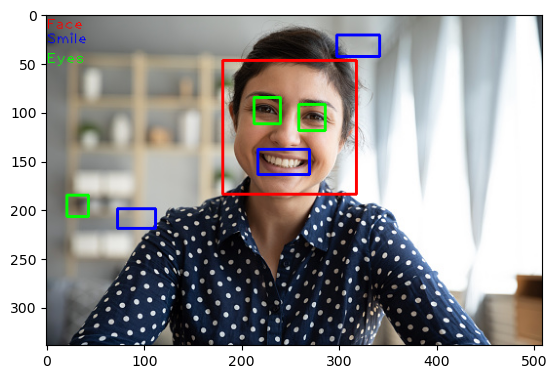

In [5]:
face_detect(cv2.imread('Images/Day 2_Programming Lab_Person.jpg'))

In [6]:
def mouth_prop(photo, scaleFactor=1.1, minNeighbors=5):
    person_grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
    faces = face_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    n = 0
    for (x, y, w, h) in faces:
        cv2.rectangle(photo, (x, y), (x+w, y+h), [255,0,0], 1)
        n += 1
        print(f"Face {n}")
        smile = smile_cascade.detectMultiScale(person_grey[y:(y+h), x:(x+w)], scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        for (xs, ys, ws, hs) in smile:
            cv2.rectangle(photo, ((x+xs), (y+ys)), ((x+xs+ws), (y+ys+hs)), [0,255,0], 1)
            smile_proportion = ws / w
            smile_proportion_height = hs / h
            print(f"Smile width proportion: {smile_proportion:.2f}")
            print(f"Smile height proportion: {smile_proportion_height:.2f}")
    plt.imshow(photo)

Face 1
Smile width proportion: 0.13
Smile height proportion: 0.07
Smile width proportion: 0.18
Smile height proportion: 0.09
Smile width proportion: 0.22
Smile height proportion: 0.11
Smile width proportion: 0.23
Smile height proportion: 0.11
Smile width proportion: 0.17
Smile height proportion: 0.09
Smile width proportion: 0.13
Smile height proportion: 0.06
Smile width proportion: 0.34
Smile height proportion: 0.17
Smile width proportion: 0.40
Smile height proportion: 0.20
Smile width proportion: 0.08
Smile height proportion: 0.04
Smile width proportion: 0.10
Smile height proportion: 0.05
Smile width proportion: 0.14
Smile height proportion: 0.07


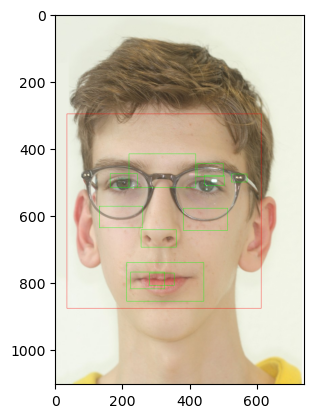

In [7]:
mouth_prop(cv2.imread('Images/marfan_syndrome.jpg'), 1.1, 10)

In [8]:
def eye_prop(photo, scaleFactor=1.1, minNeighbors=5):
    person_grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    n = 0
    for (x, y, w, h) in faces:
        cv2.rectangle(photo, (x, y), (x+w, y+h), [255,0,0], 1)
        n += 1
        print(f"Face {n}")
        eye = eye_cascade.detectMultiScale(person_grey[y:(y+h), x:(x+w)], scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        for (xs, ys, ws, hs) in eye:
            cv2.rectangle(photo, ((x+xs), (y+ys)), ((x+xs+ws), (y+ys+hs)), [0,255,0], 1)
            eye_proportion = ws / w
            eye_proportion_height = hs / h
            print(f"Eye width proportion: {eye_proportion:.2f}")
            print(f"Eye height proportion: {eye_proportion_height:.2f}")
    plt.imshow(photo)

Face 1
Eye width proportion: 0.22
Eye height proportion: 0.22
Eye width proportion: 0.18
Eye height proportion: 0.18
Eye width proportion: 0.35
Eye height proportion: 0.35


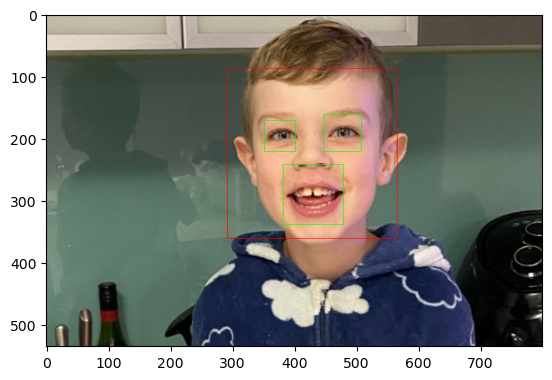

In [9]:
eye_prop(cv2.imread('Images/fragile_X_syndrome.jpg'), 1.1, 5)

In [10]:
def proportions(photo, scaleFactor=1.1, minNeighbors=5):
    person_grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    n = 0
    data = pd.DataFrame(columns=['Face', 'Face_x', 'Face_y', 'Face_w', 'Face_h', 'Smile_x', 'Smile_y', 'Smile_w', 'Smile_h', 'Eye1_x', 'Eye1_y', 'Eye1_w', 'Eye1_h', 'Eye2_x', 'Eye2_y', 'Eye2_w', 'Eye2_h'])
    for (x, y, w, h) in faces:
        cv2.rectangle(photo, (x, y), (x+w, y+h), [255,0,0], 1)
        n += 1
        data.loc[n, 'Face'] = n
        smile = smile_cascade.detectMultiScale(person_grey[y:(y+h), x:(x+w)], scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        data.loc[n, ['Face_x', 'Face_y', 'Face_w', 'Face_h']] = [x, y, w, h]
        for (xs, ys, ws, hs) in smile:
            data.loc[n, ['Smile_x', 'Smile_y', 'Smile_w', 'Smile_h']] = [x+xs, y+ys, ws, hs]
            eye = eye_cascade.detectMultiScale(person_grey[y:(y+h), x:(x+w)], scaleFactor=scaleFactor, minNeighbors=minNeighbors)
            for (xe, ye, we, he) in eye:
                if pd.isna(data.loc[n, 'Eye1_x']):
                    data.loc[n, ['Eye1_x', 'Eye1_y', 'Eye1_w', 'Eye1_h']] = [x+xe, y+ye, we, he]
                elif pd.isna(data.loc[n, 'Eye2_x']):
                    data.loc[n, ['Eye2_x', 'Eye2_y', 'Eye2_w', 'Eye2_h']] = [x+xe, y+ye, we, he]
    return(data)

In [ ]:
def proportions_overlay(photo, data, facecolor =(255,0,0), eyecolor =(0,255,0), smilecolor =(0,0,255), thickness=2):
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)

    for row in data:
        cv2.rectangle(photo, (data['Face_x'], data['Face_y']), (data['Face_x']+data['Face_w'], data['Face_y']+data['Face_h']), facecolor, thickness)
        cv2.rectangle(photo, (data['Face_x'], data['Face_y']), (data['Face_x']+data['Face_w'], data['Face_y']+data['Face_h']), facecolor, thickness)
        cv2.rectangle(photo, (data['Face_x'], data['Face_y']), (data['Face_x']+data['Face_w'], data['Face_y']+data['Face_h']), facecolor, thickness)
        cv2.rectangle(photo, (data['Face_x'], data['Face_y']), (data['Face_x']+data['Face_w'], data['Face_y']+data['Face_h']), facecolor, thickness)

    cv2.putText(photo,'Face', (0,15), cv2.FONT_HERSHEY_PLAIN, 1, facecolor, 1)
    cv2.putText(photo,'Smile', (0,30), cv2.FONT_HERSHEY_PLAIN, 1, smilecolor, 1)
    cv2.putText(photo,'Eyes', (0,50), cv2.FONT_HERSHEY_PLAIN, 1, eyecolor, 1)

    plt.imshow(photo)

In [ ]:
facial_data = proportions(cv2.imread('Images/Day 2_Programming Lab_Person.jpg'), 1.1, 5)

facial_data

1    181
Name: Face_x, dtype: object

In [79]:
def proportions_processing(data):
    data[['Smile_w_prop', 'Eye1_w_prop', 'Eye2_w_prop']] = data[['Smile_w', 'Eye1_w', 'Eye2_w']].div(data['Face_w'], axis=0)
    data[['Smile_h_prop', 'Eye1_h_prop', 'Eye2_h_prop']] = data[['Smile_h', 'Eye1_h', 'Eye2_h']].div(data['Face_h'], axis=0)
    data[['forehead_prop']] = ((((data['Face_y']+data['Face_h'])-np.mean([(data['Eye1_y']+data['Eye1_h']),(data['Eye2_y']+data['Eye2_h'])]))/data['Face_h']).iloc[0])
    return(data)

In [ ]:
data = facial_data.copy()

proportions_processing(data)

,Face,Face_x,Face_y,Face_w,Face_h,Smile_x,Smile_y,Smile_w,Smile_h,Eye1_x,...,Eye2_y,Eye2_w,Eye2_h,Smile_w_prop,Eye1_w_prop,Eye2_w_prop,Smile_h_prop,Eye1_h_prop,Eye2_h_prop,forehead_prop
1,1,181,47,137,137,209,134,71,36,206,...,86,37,37,0.518248,0.277372,0.270073,0.262774,0.277372,0.270073,0.474453


In [19]:
facial_data = pd.DataFrame()
for files in os.listdir('.\Images'):
    if files.endswith('.jpg') or files.endswith('.png'):
        print(f"Processing {files}")
        img = cv2.imread(os.path.join('.\Images', files))
        data = proportions(img, 1.1, 5)
        data['Image'] = files
        facial_data = pd.concat([facial_data, data], ignore_index=True)

Processing Angelman syndrome_editted.jpg
Processing Day 2_Programming Lab_Person.jpg
Processing fragile_X_syndrome.jpg
Processing marfan_syndrome.jpg
Processing nhs_downs_syndrome.jpg


In [20]:
facial_data

,Face,Face_x,Face_y,Face_w,Face_h,Smile_x,Smile_y,Smile_w,Smile_h,Eye1_x,Eye1_y,Eye1_w,Eye1_h,Eye2_x,Eye2_y,Eye2_w,Eye2_h,Image
0,1,37,156,317,317,63,238,137,68,227,362,50,50,112,361,52,52,Angelman syndrome_editted.jpg
1,1,181,47,137,137,209,134,71,36,206,78,38,38,254,86,37,37,Day 2_Programming Lab_Person.jpg
2,1,292,87,274,274,313,205,89,45,448,161,60,60,352,171,50,50,fragile_X_syndrome.jpg
3,1,36,300,577,577,446,481,59,29,310,646,54,54,147,464,90,90,marfan_syndrome.jpg
4,1,202,8,234,234,220,78,109,54,295,190,32,32,239,81,44,44,nhs_downs_syndrome.jpg


In [4]:
import retinaface
import boewebconnectpy
import os
import h5py
from retinaface import RetinaFace
import cv2

In [2]:
help(RetinaFace.detect_faces)

Help on function detect_faces in module retinaface.RetinaFace:

detect_faces(img_path: Union[str, numpy.ndarray], threshold: float = 0.9, model: Optional[tf_keras.src.engine.training.Model] = None, allow_upscaling: bool = True) -> Dict[str, Any]
    Detect the facial area for a given image
    Args:
        img_path (str or numpy array): given image
        threshold (float): threshold for detection
        model (Model): pre-trained model can be given
        allow_upscaling (bool): allowing up-scaling
    Returns:
        detected faces as:
        {
            "face_1": {
                "score": 0.9993440508842468,
                "facial_area": [155, 81, 434, 443],
                "landmarks": {
                    "right_eye": [257.82974, 209.64787],
                    "left_eye": [374.93427, 251.78687],
                    "nose": [303.4773, 299.91144],
                    "mouth_right": [228.37329, 338.73193],
                    "mouth_left": [320.21982, 374.58798]
         

In [5]:
boewebconnectpy.set_boe_config()

resp = RetinaFace.detect_faces(cv2.imread("./Images/Day 2_Programming Lab_Person.jpg"))

resp

Successfully set web config settings for urllib, urllib3, requests


OSError: Unable to synchronously open file (file signature not found)